# GROMACS Hydrogen-bond data processing and analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workflow" data-toc-modified-id="Workflow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workflow</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Data-collection-with-GROMACS" data-toc-modified-id="Data-collection-with-GROMACS-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data collection with GROMACS</a></span></li><li><span><a href="#Generate-a-mapping-for-groups-of-interest-(usually-residue-side-chain-and-backbone)" data-toc-modified-id="Generate-a-mapping-for-groups-of-interest-(usually-residue-side-chain-and-backbone)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Generate a mapping for groups of interest (usually residue side-chain and backbone)</a></span></li><li><span><a href="#Translate-the-output-collected-by-GROMACS-into-binary-files-that-can-be-easier-processed" data-toc-modified-id="Translate-the-output-collected-by-GROMACS-into-binary-files-that-can-be-easier-processed-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Translate the output collected by GROMACS into binary files that can be easier processed</a></span></li></ul></li><li><span><a href="#Explanations" data-toc-modified-id="Explanations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explanations</a></span><ul class="toc-item"><li><span><a href="#Data-collection-with-GROMACS" data-toc-modified-id="Data-collection-with-GROMACS-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Data collection with GROMACS</a></span></li><li><span><a href="#Generate-a-mapping-for-groups-of-interest-(usually-residue-side-chain-and-backbone)" data-toc-modified-id="Generate-a-mapping-for-groups-of-interest-(usually-residue-side-chain-and-backbone)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Generate a mapping for groups of interest (usually residue side-chain and backbone)</a></span></li><li><span><a href="#Translate-the-output-collected-by-GROMACS-into-binary-files-that-can-be-easier-processed" data-toc-modified-id="Translate-the-output-collected-by-GROMACS-into-binary-files-that-can-be-easier-processed-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Translate the output collected by GROMACS into binary files that can be easier processed</a></span></li></ul></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Prerequirements" data-toc-modified-id="Prerequirements-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prerequirements</a></span></li><li><span><a href="#Dummy-data" data-toc-modified-id="Dummy-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dummy data</a></span></li><li><span><a href="#Functions-for-common-tasks" data-toc-modified-id="Functions-for-common-tasks-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Functions for common tasks</a></span><ul class="toc-item"><li><span><a href="#Condense-H-Bond-data" data-toc-modified-id="Condense-H-Bond-data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Condense H-Bond data</a></span></li><li><span><a href="#Calculate-properties" data-toc-modified-id="Calculate-properties-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Calculate properties</a></span></li><li><span><a href="#Barcharts" data-toc-modified-id="Barcharts-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Barcharts</a></span></li><li><span><a href="#Heat-maps" data-toc-modified-id="Heat-maps-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Heat maps</a></span></li><li><span><a href="#Sorting-and-filtering" data-toc-modified-id="Sorting-and-filtering-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Sorting and filtering</a></span></li></ul></li><li><span><a href="#Work-with-the-data" data-toc-modified-id="Work-with-the-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Work with the data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.4.0.1"><span class="toc-item-num">2.4.0.1&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Workflow

### Overview

This is one possibility how to carry out a hydrogen-bond analysis with GROMACS.

#### Data collection with GROMACS

Find hydrogen-bonds in MD trajectory: Hydrogen-bond existence matrix (hbm.xpm) and identifier indices (hbn.ndx) 
    
```bash
gmx hbond -f traj_fixed_fitted.xtc -s run.tpr -hbm hbm.xpm -hbn hbn.ndx
```
    
#### Generate a mapping for groups of interest (usually residue side-chain and backbone)

To translate the hydrogen-bond identifier index tuples (donor, hydrogen, acceptor) in hbn.ndx to more meaningful descriptive names we can use a mapping of the form `{"group": [atom_indices]}`. Such a mapping can be for example created in two steps.

Use GROMACS to extract groups from a reference file into another index file (residues.ndx)

```bash
gmx select -f ref.gro -s ref.gro -on residues.ndx -select \
           "resid 1 and group SideChain" "resid 1 and not group SideChain" \         
           "resid 2 and group SideChain" "resid 2 and not group SideChain" \
            ...
```            

Convert the created index file into a Python dictionary (residues.npy or residues.json)

```bash
ndx2dict residues.ndx
```                 

#### Translate the output collected by GROMACS into binary files that can be easier processed

Convert existence matrix (hbm.xpm to hbm.npy) and identifiers (hbn.ndx to hbn.npy)

```bash
hbxpm2npy -hbm hbm.xpm -hbn hbn.ndx -d residues.npy
```

### Explanations

#### Data collection with GROMACS

The GROMACS tool `gmx hbond` can find hydrogen-bonds between donor and acceptor atoms in two specified index groups, 
which are either none overlapping or identical. Please refer to the gromacs documentation (http://manual.gromacs.org/documentation/2020.1/onlinehelp/gmx-hbond.html) for more
information on how the data is collected. For many analyses, it is useful to have hydrogen-bond
existence functions, i.e. the binary information on which bond is present/not present in which trajectory time-frame. This
we can get by the output options -hbm and -hbn. To extract all possible interactions, one can select in the upcoming interactive dialog
the whole molecule of interest ("Protein") twice.

The -hbm option will generate an .xpm output-file of the following format (text file):

```bash
/* XPM */
/* This file can be converted to EPS by the GROMACS program xpm2ps */
/* title: ... */

...  # Other comments

static char *gromacs_xpm[] = {  # C function telling gmx xpm2ps how to plot the content of this file
"x y   a b",
"    c #FFFFFF " /* "None" */,
"o   c #FF0000 " /* "Present" */,
/* x-axis: 0 1 2 3 4 5 6 7 8 ... */  # Axis labels
/* y-axis: 0 1 2 3 4 5 6 7 8 ... */
"    oo  ooooo o        oooooooooooooooooooooo     ooooo  oooo o [...]"  # H-bond existence
```

A hydrogen-bond existence function is given as a string of the same length as the trajectory, in which a space denotes the absence and the letter "o" denotes the presence of the bond in the respective frame.

To complement this, the -hbn option generates an .ndx output-file of the following format (text file):

```bash
[ <Group> ]  # Selected index group
  atom1 atom2 atom3 ...

[ donor_hydrogens_<Group> ]  # Found donor-H pairs
   1   2   1   3   1   4
  atomD1 atomH1
  atomD2 atomH2 atomD2 atomH3 
  ...

[ acceptors_<Group> ]  # Found acceptors
  atomA1 atomA2 atomA3
  ...

[ hbonds_<Group>]  # H-Bbond identifier index tuples (donor, hydrogen, acceptor)
  atomD1 H1 atomA1
  ...
```

The placeholder <Group> will be filled with the specific selection (e.g. "Protein"). To know to which bond a particular existence function belongs, one needs to look up the identifier tuple in the hbn.ndx file in the [ hbonds_<Group>]. The first index tuple corresponds to the last line in the hbm.xpm file. 

These kinds of formats are not very handy, so we will convert them to something more convenient.
Essentially we are interested in hydrogen bond existence functions in a pure format and more descriptive
hydrogen-bond identifiers.

#### Generate a mapping for groups of interest (usually residue side-chain and backbone)

To give comprehensible names to the hydrogen bonds found by GROMACS as D-H-A atom-ID tuples, we need
to define first, how we want to map the atom-IDs to groups. When we deal with proteins, atoms
are commonly associated to the side-chain or the backbone of a residue. We can get such a mapping for example as index-file (index.ndx) by te GROMACS tool "gmx select". The -on option will generate an output-file of the following format (text file),
containing the index groups given as -select option:

```bash
[ 1s ]
atom1 atom2 atom3 ...

[ 1m ]
atom4 atom5 atom6 ...
```
    
Again we will convert this file into something more usable. The Python script ndx2dict can be used to bring an index file like output by "gmx select" into a Python dictionary of the form:

```Python
{
'1s': [atom1, atom2, atom3, ...],
'1m': [atom4, atom5, atom6, ...],
...
}
```
    
The script takes the name of the .ndx file as input and creates per default a .npy file of the same
name.

#### Translate the output collected by GROMACS into binary files that can be easier processed

Using the mapping information generated in the last step we can convert the output of "gmx hbond" with the Python script hbxpm2npy. The options needed are -hbm and -hbn to specify the .xpm and .ndx input, and -d for the mapping. The option -sel needs to be specified, if any other index group
than "Protein" was selected in the "gmx hbond" process. Finally, hydrogen bond existence functions are
stored in a matrix of shape (#frames, #bonds) as 2D numpy.ndarray with dtype np.uint8.

```Python
array([[0, 0, 0, 0, 1],   # 0: Bond is absent
       [1, 1, 1, 0, 1],   # 1: Bond is present
        ...           ])  # One row per trajectory time step, one column per H-bond
```
    
The hydrogen-bond identifiers are stored as array of  strings. The existence function for the first bond is found in the first column of the existence matrix and its name identifier in the first element of the identifier-array.

```Python
array(['1m-3s', '4s-5s', ...])
```
    
So if we are interested in the hydrogen bond existing function for a bond 'bondID' we can use simple
array indexing to get it:

```Python
hbond_existence = hbm[:, np.where(hbn == 'bondID')[0]]
```
    
Note that due to the atomID merging into index groups, bondIDs may not be unique anymore but remain as 
separated entries in the hbm matrix. For example, GROMACS treats the two hydrogen atoms of a primary
amine as two different donor atoms (different atomIDs) resulting in two different existence functions
for usually equivalent bonds. You may need to account for this in your analysis.

## Analysis

<div class="alert alert-info">

**Note:**

</div>

### Prerequirements

In [1]:
from collections import defaultdict
import copy
import functools
import importlib
from os.path import expandvars
import pathlib
import re
import shlex
import subprocess
from typing import Iterable, Callable

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import pandas as pd
import tqdm

### Dummy data

Let's pretend we have collected hydrogen bond data from a set of independent simulations of a protein in two state A and B. We mimic this situation by generating random data.

In [146]:
def generate_existence_data(frequency, length):
    existence = np.zeros(length, dtype=np.uint8)
    absolute_frequency = int(length * frequency)
    existence[:absolute_frequency] = 1
    np.random.shuffle(existence)
    return existence

In [153]:
specs = {  # system, replica, (lengt, occupancies)
    "A": {
        "1": (
            100, {
            "S4-D1_1": 0.25,
            "K8-D1_1": 0.50,
            "K8-H3_1": 0.10,
            }
        ),
        "2": (
            200, {
            "S4-D1_1": 0.30,
            "K8-D1_1": 0.55,
            "K8-H3_1": 0.5,   # Chemically same bond
            "K8-H3_2": 0.10,  # Chemically same bond
            "H3-E7_1": 0.10,
            }
        ),
        "3": (
            200, {
            "S4-D1_1": 0.20,
            "K8-D1_1": 0.60,
            "K8-H3_1": 0.20,
            "H3-E7_1": 0.15,
            }
        ),
        "4": (
            600, {
            "K8-D1_1": 0.80,
            "K8-H3_1": 0.15,
            "H3-E7_1": 0.5,
            }
        ),
    },
    "B": {
        "1": (
            600, {
            "S4-D1_1": 0.30,
            "K8-D1_1": 0.40,
            "K8-H3_1": 0.10,
            }
        ),
        "2": (
            55, {
            "S4-D1_1": 0.20,
            "K8-D1_1": 0.70,
            "K8-H3_1": 0.10,
            }
        ),
        "3": (
            70, {
            "S4-D1_1": 0.15,
            "K8-D1_1": 0.60,
            "K8-H3_1": 0.20,
            }
        ),
    },    
}

In [154]:
pool = {}
for system, system_specs in specs.items():
    pool[system] = {}
    for replica, (length, bonds) in system_specs.items():
        pool[system][replica] = {}
        pool[system][replica]["hbn"] = np.array([b[:-2] for b in bonds.keys()])
        
        pool[system][replica]["hbm"] = np.zeros(
            (length, len(bonds.values())), dtype=np.uint8
        )
        
        for i, frequency in enumerate(bonds.values()):
            pool[system][replica]["hbm"][:, i] = generate_existence_data(
                frequency, length
            )
                                            
pool

{'A': {'1': {'hbn': array(['S4-D1', 'K8-D1', 'K8-H3'], dtype='<U5'),
   'hbm': array([[0, 1, 0],
          [1, 0, 0],
          [0, 0, 1],
          [0, 0, 0],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [0, 0, 1],
          [0, 1, 0],
          [1, 1, 0],
          [0, 0, 0],
          [0, 1, 0],
          [0, 1, 0],
          [0, 0, 0],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 1],
          [1, 0, 1],
          [0, 0, 0],
          [0, 0, 0],
          [0, 1, 0],
          [0, 0, 0],
          [1, 0, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 1, 0],
          [0, 1, 0],
          [0, 0, 0],
          [0, 0, 0],
          [1, 0, 0],
          [0, 1, 0],
          [0, 0, 0],
          [1, 1, 0],
          [0, 0, 0],
          [0, 1, 0],
          [0, 0, 0],
          [1, 1, 0],
          [0, 0, 0],
          [1, 0, 0],
          [0, 0, 0],
          [0, 1, 1],
          [0, 0, 0],
          [0, 0, 1],
          [1, 1, 0],


Instead of using the created data directly, we use a more indirect data interface here. In this way we can define
the template functions in this notebook largely independent of how data is stored.

In [156]:
def get_from_pool(location: Iterable, label: str = None, pool: dict = None):
    """Retrieve data from pool
    
    Args:
        location: List of keys leading to data in pool.
        label: Key, ultimately retrieved from the pool (optional).
        pool: Pool from which to return data.  If None, returns None.
        
    Returns:
        Data at `location` in pool
        Data with key `label` at `location` in pool
    """
    
    if pool is None:
        return
    
    p = pool
    for part in location:
        returned_data = p[part]
        p = returned_data
    
    if label is not None:
        return returned_data[label]
    return returned_data

get_from_set_pool = functools.partial(get_from_pool, pool=pool)

In [157]:
# Example usage
get_from_set_pool(["B", "1", "hbn"])

array(['S4-D1', 'K8-D1', 'K8-H3'], dtype='<U5')

### Functions for common tasks

If the functions defined here access raw collected data, this happens in the following way: the function takes a `view` argument which holds an iterable collection of location keys by which data can be retrieved. Another argument `data_getter` takes a function which handles the data retrieval.

#### Condense H-Bond data

In [158]:
def condense_hbdata(
        view: Iterable, data_getter: Callable,
        bonds: list = None,
        res_range: tuple = None,
        stride=1,
        global_stride=False):
    """Condense raw H-bond information
    
    Read H-bond existence matrices (hbm) and identifier arrays (hbn)
    for a given view.  Return a merged and
    reduced matrix containing only specific bonds.
    
    Args:
        view: A view of locations (passed on to `data_getter`).
        data_getter: Function handling data retrieval
            (takes locations from `view`).  Data processed by this
            function is labeled "hbn" (H-bond identifiers) and "hbm"
            (H-bond existence matrix).
        bonds: List of strings representing bonds to extract.
            If None, all bonds are kept.
        res_range: Tuple denoting the range of allowed residues.
            If None, all bonds are kept. Only valid if bond identifiers
            contain integers and if donor and acceptor strings are
            separated by "-".
        stride: Keep only every nth trajectory frame.
        global_stride: Normally, `stride` is used on each part of
            the given view separately.  Alternatively `stride` can be
            used
            as if applied to the entirety of the data once in the end.
            Data is
            still loaded per location into memory.
            Setting this to `True` enables alternative global striding.
    """
     
    if bonds is None:
        bonds = create_bond_list(view, data_getter)
    
    if res_range is not None:
        bonds = [bond for bond in bonds if bond_in_range(bond, res_range)]
                         
    n_bonds = len(bonds)
    
    exfunction = []
    
    if stride_globally:
        last_dropped = None

    for v in tqdm.tqdm(view):            
        # load hbm/hbn                         
        if global_stride:
            hbm, last_dropped = stride_globally(
                data_getter(v, "hbm" ),
                stride,
                last_dropped
            )
          
        else:
            hbm = data_getter(v, "hbm" )[::stride]
        
        weight = len(hbm)
        
        hbn = data_getter(v, "hbn" )
       
        bond_indices = [
            np.where(hbn == b)[0] for b in bonds
            ]
        
        _exfunction = np.zeros((weight, n_bonds), dtype=np.uint8)
        
        for count, i in enumerate(bond_indices):            
            occurance = len(i)
            if occurance == 1:
                _exfunction[:, count] = hbm[:, i[0]]
                continue
                
            if occurance > 1:
                for index in i:
                    _exfunction[:, count] += hbm[:, index]
                
        exfunction.append(np.copy(_exfunction))
    
    exfunction = np.vstack(exfunction)
    exfunction[exfunction > 1] = 1
    
    return exfunction, bonds

In [159]:
def create_bond_list(view: Iterable, data_getter: Callable):
    """Collect bonds from H-bond identifier arrays"""

    bonds = set()
    for v in view:
        bonds.update(data_getter(v, "hbn"))
    return list(bonds)

In [160]:
def bond_in_range(bond, range):
    """Check if bond partner IDs are in range"""
    parts = bond.split("-")
    for p in parts:
        match = re.search(r"[0-9]+", p)
        if match is None:
            return None

        match = int(match.group())
        if match > range[1]:
            return False
        if match < range[0]:
            return False
    return True

In [161]:
def stride_globally(sliceable, stride, last_dropped=None):
    """Mimic stridding of a slicable object in a global fashion"""
 
    if last_dropped is None:
        last_dropped = (stride - 1)

    drop_left = (stride - 1) - last_dropped

    length_after_left_drop = len(sliceable) - drop_left
    stridden = sliceable[drop_left::stride]

    n_strides, remainder = np.divmod(length_after_left_drop, stride)

    if remainder == 0:
        n_strides -= 1
 
    last_dropped = length_after_left_drop - (n_strides * stride + 1)
        
    return stridden, last_dropped

#### Calculate properties

In [162]:
def occupancy(existence_matrix):
    """Calculate occupancies from H-bond existence matrix"""
    
    return np.sum(existence_matrix, axis=0) / len(existence_matrix)

In [163]:
def pearson_corr(existence_matrix):
    """Calculate Pearson-correlation from H-bond existence matrix
    
    Elementwise iterative calculation for memory efficiency
    """
    
    n_bonds = len(existence_matrix[0])
    C = np.zeros((n_bonds, n_bonds))
    
    for i in tqdm.tqdm(range(n_bonds)):
        for j in range(i + 1, n_bonds):        
            C[i, j] = np.corrcoef(
                existence_matrix[:, i], 
                existence_matrix[:, j]
                )[0, 1]
    
    return C + C.T

#### Barcharts

In [164]:
def barchart(
        upper, lower=None, upper_props=None, lower_props=None,
        bonds=None, ax=None, ax_props=None,
        grid=True, grid_props=None):
    """Make a bar plot of occupancies
    
    Args:
        upper: An occupancy array. Bars are drawn upright.
        lower: Another occupancy array. If `lower` is given, bars are
            drawn downwards. Upper and lower arrays
            need to be of same length.
        upper_props: Dictionary of keyword arguments passed on to
            `bar` for the upper bars.
        lower_props: Dictionary of keyword arguments passed on to
            `bar` for the lower bars.
        bonds: H-bond identifiers used as labels.
        ax: Matplotlib `AxesSubplot` instance to draw on.
        ax_props: Dictionary of keyword arguments passed on to
            `set`.
        grid: Draw a grid in the background of the plot.        
        grid_props: Dictionary of keyword arguments passed on to
            `grid`.
    """
    
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
               
    upper_props_defaults = {
        'align': 'center',
        'edgecolor': 'k',
        'zorder': 10
        }
    
    if upper_props is not None:
        upper_props_defaults.update(upper_props)
        
    lower_props_defaults = {
        'align': 'center',
        'edgecolor': 'k',
        'zorder': 10
        }
    
    if lower_props is not None:
        lower_props_defaults.update(lower_props)
        
    grid_props_defaults = {
        "color": 'k',
        "alpha": 0.3,
        "axis": "x",
        "zorder": 0
        }
    
    if grid_props is not None:
        grid_props_defaults.update(grid_props)
    
    if grid:
        ax.grid(**grid_props_defaults)    
    
    if bonds is None:
        bonds = range(len(upper))
        
    xpos = np.arange(len(bonds))
    
    ax_props_defaults = {
        'xticks': xpos,
        'xticklabels': (bonds),
        'ylabel': 'occupancy in %',
        'xlim': (-1, len(bonds)),
        'ylim': (0, 110),
        'yticks': (0, 50, 100)
        } 
    
    upperbars = ax.bar(
        xpos,
        upper * 100,
        **upper_props_defaults
        )

    if lower is not None:
        lowerbars = ax.bar(
            xpos,
            -lower * 100,
            **lower_props_defaults
            )

        ax_props_defaults.update({
            'ylim': (-110, 110),
            'yticks': (-100, -50, 0, 50, 100)
            })

    if ax_props is not None:
        ax_props_defaults.update(ax_props)
       
    # Extract axes limits for separate setting
    xlim = ax_props_defaults["xlim"]
    del ax_props_defaults["xlim"]
    ylim = ax_props_defaults["ylim"]
    del ax_props_defaults["ylim"]
    
    ax.set(**ax_props_defaults)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
    ax.hlines(0, xmin=xlim[0], xmax=xlim[-1], color='k')

    ax.set_xbound(lower=xlim[0], upper=xlim[1])
    ax.set_ybound(lower=ylim[0], upper=ylim[1])
    ax.set_yticklabels([int(abs(y)) for y in ax.get_yticks()])
    
    if lower is not None:
        return ax, upperbars, lowerbars    
    return ax, upperbars

In [165]:
def barcharth(
        right, left=None, right_props=None, left_props=None,
        bonds=None, ax=None, ax_props=None,
        grid=True, grid_props=None):
    """Make a bar plot of occupancies
    
    Args:
        right: An occupancy array. Bars are drawn to the right.
        left: Another occupancy array. If `left` is given, bars are
            drawn to the left. Right and left arrays
            need to be of same length.
        right_props: Dictionary of keyword arguments passed on to
            `bar` for the upper bars.
        left_props: Dictionary of keyword arguments passed on to
            `bar` for the lower bars.
        bonds: H-bond identifiers used as labels.
        ax: Matplotlib `AxesSubplot` instance to draw on.
        ax_props: Dictionary of keyword arguments passed on to
            `set`.
        grid: Draw a grid in the background of the plot.        
        grid_props: Dictionary of keyword arguments passed on to
            `grid`.
    """
    
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
               
    right_props_defaults = {
        'align': 'center',
        'edgecolor': 'k',
        'zorder': 10
        }
    
    if right_props is not None:
        right_props_defaults.update(right_props)
        
    left_props_defaults = {
        'align': 'center',
        'edgecolor': 'k',
        'zorder': 10
        }
    
    if left_props is not None:
        left_props_defaults.update(left_props)
        
    grid_props_defaults = {
        "color": 'k',
        "alpha": 0.3,
        "axis": "y",
        "zorder": 0
        }
    
    if grid_props is not None:
        grid_props_defaults.update(grid_props)
    
    if grid:
        ax.grid(**grid_props_defaults)    
    
    if bonds is None:
        bonds = range(len(right))
        
    ypos = np.arange(len(bonds))
    
    ax_props_defaults = {
        'yticks': ypos,
        'yticklabels': (bonds),
        'xlabel': 'occupancy in %',
        'ylim': (-1, len(bonds)),
        'xlim': (0, 110),
        'xticks': (0, 50, 100)
        } 
    
    rightbars = ax.barh(
        ypos,
        right * 100,
        **right_props_defaults
        )

    if left is not None:
        leftbars = ax.barh(
            ypos,
            -left * 100,
            **left_props_defaults
            )

        ax_props_defaults.update({
            'xlim': (-110, 110),
            'xticks': (-100, -50, 0, 50, 100)
            })

    if ax_props is not None:
        ax_props_defaults.update(ax_props)
       
    # Extract axes limits for separate setting
    xlim = ax_props_defaults["xlim"]
    del ax_props_defaults["xlim"]
    ylim = ax_props_defaults["ylim"]
    del ax_props_defaults["ylim"]
    
    ax.set(**ax_props_defaults)
   
    ax.vlines(0, ymin=ylim[0], ymax=ylim[-1], color='k')

    ax.set_xbound(lower=xlim[0], upper=xlim[1])
    ax.set_ybound(lower=ylim[0], upper=ylim[1])
    ax.set_xticklabels([int(abs(x)) for x in ax.get_xticks()])
    
    if left is not None:
        return ax, rightbars, leftbars    
    return ax, rightbars

#### Heat maps

In [108]:
def hmap(
        M, ax=None,
        size_scale=300, scatter_props=None,
        xlabels=None, ylabels=None):
    """Plot a matrix as heatmap with size-scaled elements"""
    
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
    
    x = []
    y = []
    z = []

    for i in range(len(M)):
        for j in range(len(M[0])):
            x.append(i)
            y.append(j)
            z.append(M[i, j])
    
    scatter_props_defaults = {
        "marker": 's',  # Use square as scatterplot marker
        }

    if scatter_props is not None:
        scatter_props_defaults.update(scatter_props)  
     
    mapable = ax.scatter(
        x=x,
        y=y,
        s=np.absolute(np.asarray(z)) * size_scale,
        c=np.asarray(z),
        **scatter_props_defaults
    )
    
    ax.set(**{"xticks": np.unique(x), "yticks": np.unique(y)})
    
    if xlabels is not None:
        ax.set_xticklabels(xlabels, rotation=90)
        if ylabels is None:
            ax.set_yticklabels(xlabels)
        else:
            ax.set_yticklabels(ylabels)
    
    return mapable

#### Sorting and filtering

In [188]:
def mingle(o1, o2, b1, b2):
    """Unify observation and identifiers for two systems"""
    
    O = {}
    for c, b in enumerate(b1):
        O[b] = (o1[c], 0)
    
    for c, b in enumerate(b2):
        try:
            O[b] = (O[b][0], o2[c])
        except KeyError:
            O[b] = (0, o2[c])
            
    return O

In [107]:
def significant_change(a1, a2, cutoff=0.2):
    """Return indices of values that differ significantly in two arrays
    
    Args:
       a1: Array.
       a2: Another array of same length as a2.
       cutoff: Relative significance cutoff. 
    
    """
    assert isinstance(a1, np.ndarray) and isinstance(a2, np.ndarray)
    assert len(a1) == len(a2)
    
    d = np.absolute(a1 - a2)
    max_ = np.max([a1, a2], axis=0)
    c = np.divide(
        d,
        max_,
        out=np.zeros_like(max_),
        where=(max_ != 0)
        )
    return np.where(c > cutoff)

In [246]:
def filter_by_threshold(o1, o2, threshold=(0.1, 0.9)):
    """Filter observations by common threshold
    
    Find those indices where the value in at least one of two observations
    falls within a threshold range.
    """
    
    t1 = np.where((o1 > threshold[0]) & (o1 < threshold[1]))[0]
    t2 = np.where((o2 > threshold[0]) & (o2 < threshold[1]))[0]
    
    return np.unique(np.concatenate((t1, t2)))

In [57]:
def get_fragment(r, b):
    """Search for indices of bonds in bond list
    
    r: list of residues that should be take part in the bond
    b: bond list
    """
    
    indices = []
    for i in r:
        for c, j in enumerate(b):
            if i in j:
                indices.append(c)
    return np.unique(indices)

In [58]:
def pad_ex(ex, b, bnew):
    exnew = np.zeros((len(ex), len(bnew)), dtype=np.uint8)
    for c, i in enumerate(bnew):
        try:
            exnew[:, c] = ex[:, b.index(i)]
        except ValueError:
            continue
    return exnew

In [59]:
def to_sparse(M, b, cutoff=0.5):
    b_ = []
    m = []
    for i in range(len(M)):
        for j in range(i, len(M[0])):
            if abs(M[i, j]) > cutoff:
                m.append(M[i, j])
                b_.append(f"{b[i]}|{b[j]}")
    return b_, m

### Work with the data

In [169]:
views = {
    "A": [["A", "1"], ["A", "2"], ["A", "3"], ["A", "4"]],
    "B": [["B", "1"], ["B", "2"], ["B", "3"]]
}

In [211]:
identifiers

{'A': ['K8-D1', 'K8-H3', 'S4-D1', 'H3-E7'], 'B': ['K8-D1', 'K8-H3', 'S4-D1']}

In [221]:
# Condense H-bond data in pool
existence_data = {}
identifiers = {}
for system, view in views.items():
    existence, ids = condense_hbdata(view, get_from_set_pool)
    existence_data[system] = existence
    identifiers[system] = ids

100%|██████████| 3/3 [00:00<00:00, 17848.10it/s]


In [222]:
# Calculate occupancies and unify observation
occupancies = {}
for system, data in existence_data.items():
    occupancies[system] = occupancy(data)

mingled =  mingle(
    occupancies["A"], occupancies["B"],
    identifiers["A"], identifiers["B"],
)
mingled_identifiers = np.array(list(mingled.keys()))
mingled_occupancies = {}
mingled_occupancies["A"], mingled_occupancies["B"] = (np.array(x) for x in zip(*mingled.values()))

In [225]:
# Short summary
for k, v in existence_data.items():
    try:
        print(f"{k}:")
        print(f"    {len(v)} frames")
        print(f"    {len(np.unique(identifiers[k]))} unique bonds\n")
    except NameError:
        print(f"incomplete information on key {k}")

print("=" * 72)
print(f"{len(np.unique(np.concatenate(list(identifiers.values()))))} unique bonds in all systems")

A:
    1100 frames
    4 unique bonds

B:
    725 frames
    3 unique bonds

4 unique bonds in all systems


In [250]:
# Apply occupancy cutoff
consider = filter_by_threshold(
    mingled_occupancies["A"],
    mingled_occupancies["B"],
)

In [252]:
# Sorting
sort_i_occ_filtered = np.argsort(mingled_occupancies["A"])  # By occupancy in A
sort_i_name_filtered = np.argsort(mingled_identifiers)      # By bondname

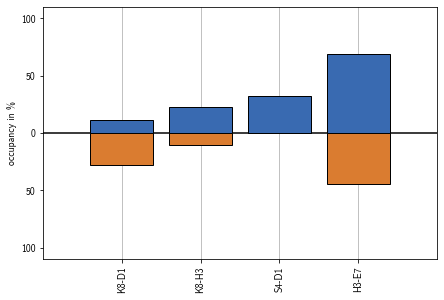

In [254]:
fig, ax = plt.subplots()

_ = barchart(
    upper=mingled_occupancies["A"][consider][sort_i_occ_filtered],
    lower=mingled_occupancies["B"][consider][sort_i_occ_filtered],
    bonds=mingled_identifiers,
    ax=ax
    )

fig.tight_layout(pad=0.1)

In [82]:
#### Fragment definitions
f = {
    "sl": [str(x) for x in range(257, 265)],  # short loop
    "ll": [str(x) for x in range(283, 295)] + ["308"]  # long loop
    }
fragments = {}
for k, v in f.items():
    fragments[k] = get_fragment(
        v, np.asarray(mingled_bonds_f)[si]
        )  # sorted bonds by occupancy!!!       
fragments["sl_ll"] = np.intersect1d(fragments["sl"], fragments["ll"])

fragments_name = {}
for k, v in f.items():
    fragments_name[k] = get_fragment(
        v, np.asarray(mingled_bonds_f)[si_name]
        )  # sorted bonds by name!!!      
fragments_name["sl_ll"] = np.intersect1d(fragments_name["sl"], fragments_name["ll"])

# fragment_colors = iter(["red", "yellow", "purple"])
fragment_colors = {
    "sl": "red",
    "ll": "yellow",
    "sl_ll": "purple"
}

In [83]:
fragments

{'sl': array([ 0,  3,  4,  5,  6,  7, 14, 20, 27, 29, 30, 32, 34, 45, 51, 71, 89,
        92]),
 'll': array([  0,   3,   6,   8,  14,  15,  19,  23,  26,  27,  28,  36,  42,
         45,  81,  87,  91,  92,  93, 108]),
 'sl_ll': array([ 0,  3,  6, 14, 27, 45, 92])}

In [85]:
np.asarray(mingled_bonds_f)[si]

array(['294s-261s', '230m-220s', '229s-220s', '257s-308s', '262m-261s',
       '257s-261s', '288s-261s', '258m-256m', '294s-291m', '276m-273m',
       '312m-312s', '226s-225m', '302s-301m', '223m-220m', '288s-260m',
       '289m-287s', '276s-234m', '249m-247m', '226m-222m', '294m-292m',
       '265s-264m', '297s-251m', '305m-303m', '308m-285s', '279s-276m',
       '218m-215m', '287s-284m', '257s-293m', '256s-294m', '263m-258m',
       '272m-264m', '277m-274m', '259m-263m', '279s-276s', '264m-263s',
       '278m-274m', '288s-291s', '266m-270m', '239s-306s', '304s-279m',
       '297s-307s', '222m-219m', '294m-309m', '215m-218s', '278m-275m',
       '257s-294s', '281m-278m', '265s-256m', '235m-238s', '306s-239s',
       '235s-238m', '262m-259m', '238m-235m', '239s-303m', '275m-273s',
       '281m-277m', '228s-226m', '245m-241m', '279m-276m', '244s-240s',
       '215s-218s', '235s-238s', '304s-281m', '302s-304m', '230m-229s',
       '249m-246m', '305m-280m', '245m-242m', '226s-222m', '277m

In [88]:
np.asarray(mingled_bonds_f)[si][fragments["sl_ll"]]

array(['294s-261s', '257s-308s', '288s-261s', '288s-260m', '257s-293m',
       '257s-294s', '257m-294m'], dtype='<U9')

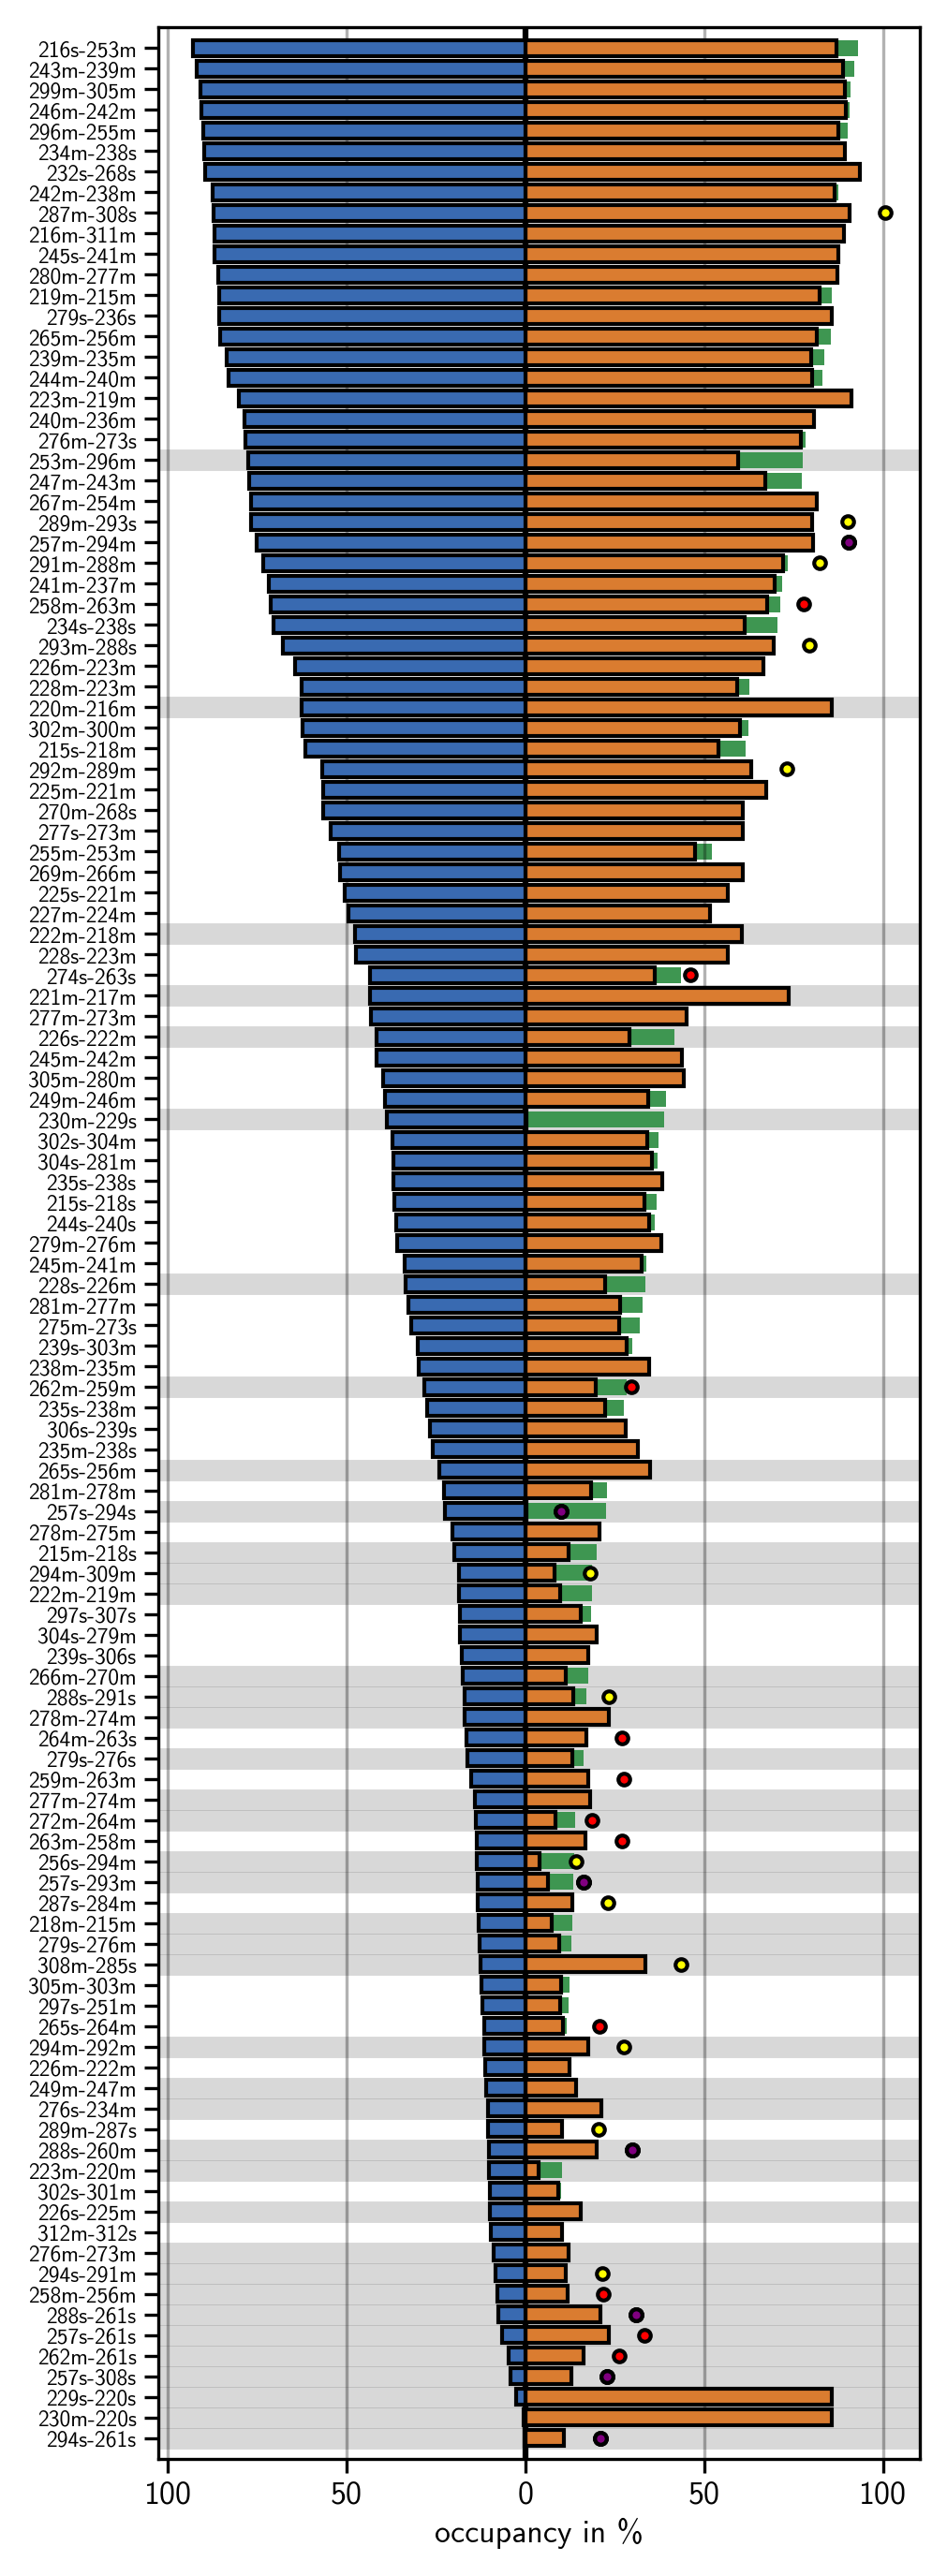

In [106]:
# matplotlib configuration
fontsize = copy.copy(mpl.rcParams["font.size"])
xticklabelsize = copy.copy(mpl.rcParams["xtick.labelsize"])
yticklabelsize = copy.copy(mpl.rcParams["ytick.labelsize"])
labelsize = copy.copy(mpl.rcParams["axes.labelsize"])
xtickmajorpad = copy.copy(mpl.rcParams["xtick.major.pad"])
ytickmajorpad = copy.copy(mpl.rcParams["ytick.major.pad"])
labelpad = copy.copy(mpl.rcParams["axes.labelpad"])

mpl.rcParams['font.size'] = 10
mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rcParams['ytick.labelsize'] = 'xx-small'
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2
mpl.rcParams['axes.labelpad'] = 2

fig, ax = plt.subplots(figsize=(
    3.2, 9
    ))

significant_change = sig_ch(mingled_occ_f[v1][si], mingled_occ_f[v2][si])[0]

for i in significant_change:
    ax.axhline(i, color='gray', alpha=0.3, linewidth=5.5, zorder=0)

ax, left, right = barcharth(
    left=mingled_occ_f[v1][si], right=mingled_occ_f[v2][si],
    left_props={"zorder": 3, "color": "#396ab1ff"}, right_props={"zorder": 3, "color": "#da7c30ff"},
    bonds=np.asarray(mingled_bonds_f)[si], ax=ax
    )

ypos = np.arange(len(mingled_bonds_f))
ax.barh(
    ypos,
    mingled_occ_f[v1][si]*100,
    zorder=1,
    color="#3e9651ff"
    )

# Annotate correlation/relations
# ax.annotate(
#    '', xy=(1.5, 20), xytext=(1.5, 20.01), xycoords='data', 
#     fontsize=15, ha='center', va='center',
#     bbox=dict(boxstyle='square', fc='firebrick'),
#     arrowprops=dict(arrowstyle='-[, widthB=0.54, lengthB=0.4', lw=1.0),
#     color='white'
#     )


# Annotate fragments
for k, v in fragments.items():
    ax.plot(
        (mingled_occ_f[v2][si][v]*100) + 10, v,
        color='none',
        marker="o",
        markersize=3,
        markeredgecolor='k',
        markerfacecolor=fragment_colors[k]
        )

ax.set_ylim(-1, len(mingled_bonds_f))
fig.tight_layout(pad=0.1)
fig.savefig("/home/janjoswig/Projects/Langerin/Manuscript/figsrc/hb/occupancies_h0h3_SI.png")

mpl.rcParams['font.size'] = fontsize
mpl.rcParams['xtick.labelsize'] = xticklabelsize
mpl.rcParams['ytick.labelsize'] = yticklabelsize
mpl.rcParams['axes.labelsize'] = labelsize
mpl.rcParams['xtick.major.pad'] *= xtickmajorpad
mpl.rcParams['ytick.major.pad'] *= ytickmajorpad
mpl.rcParams['axes.labelpad'] *= labelpad

##### Correlation

In [43]:
Ex_all_p = {}
for k in mingled_occ_f.keys():
    Ex_all_p[k] = pad_ex(Ex_all[k], all_bonds[k], np.asarray(mingled_bonds_f)[si_name])
    
for k, v in Ex_all_p.items():
    print(f"Shape of existance matrix for {k} after padding: {v.shape}")

Shape of existance matrix for h0B after padding: (3131125, 128)
Shape of existance matrix for h3A after padding: (2704921, 128)


In [44]:
C = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    for k, v in Ex_all_p.items():
        C[k] = corr(v)
        
for k, v in C.items():
    C[k][np.isnan(v)] = 0

100%|██████████| 128/128 [06:37<00:00,  3.11s/it]


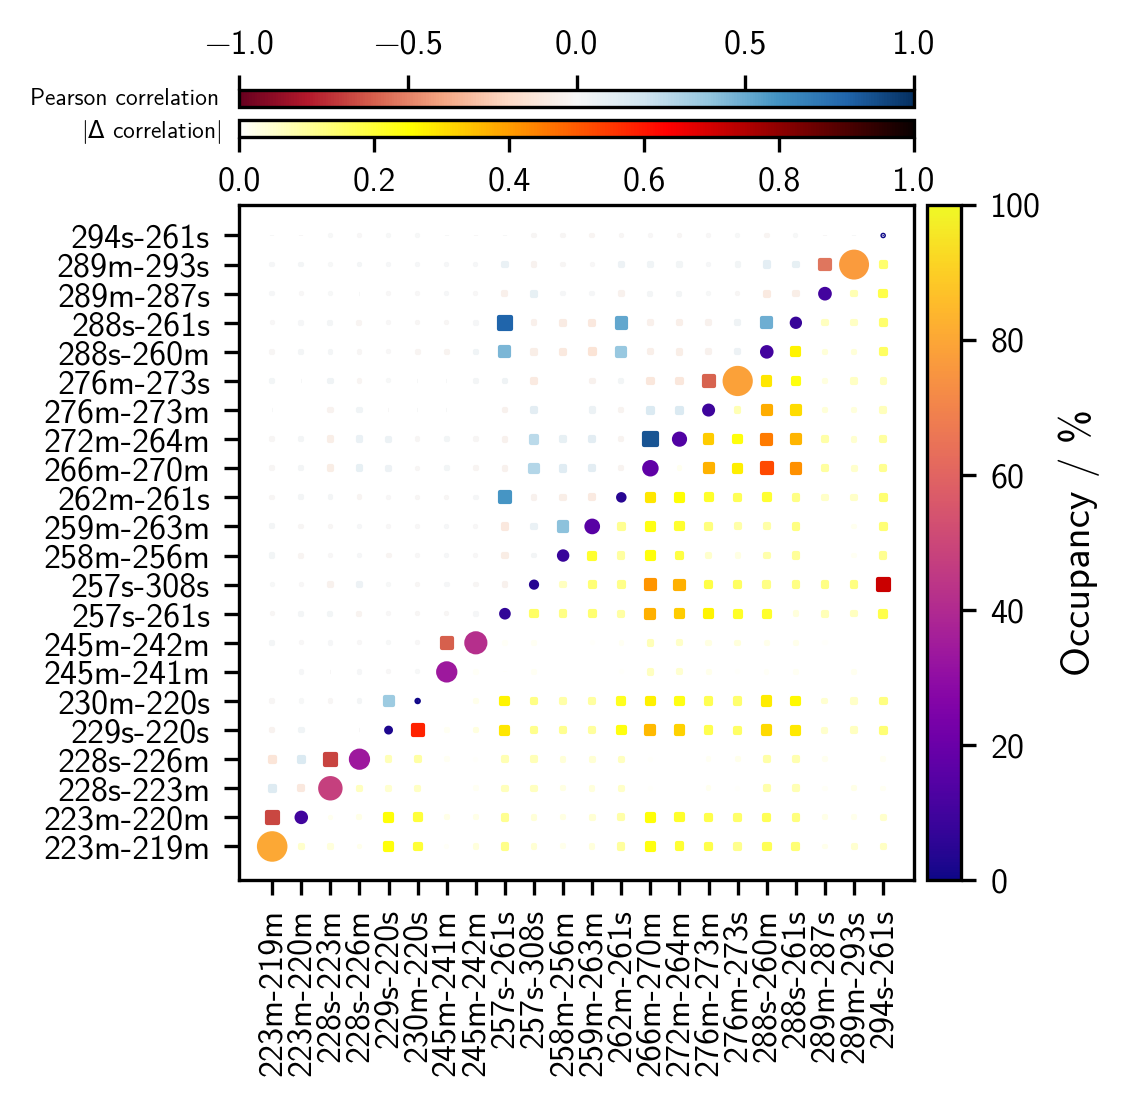

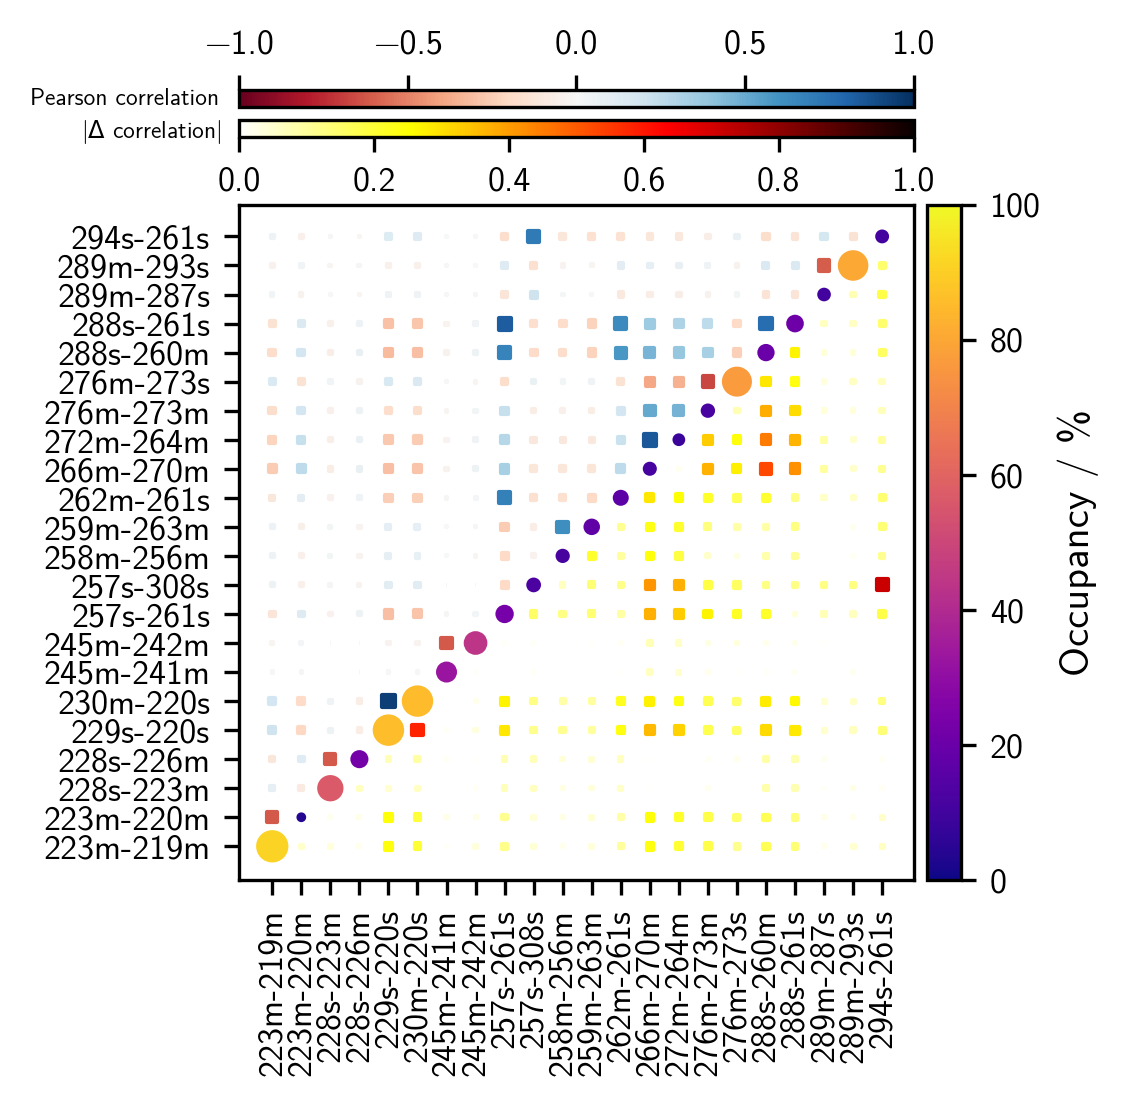

In [243]:
xticklabelsize = copy.copy(mpl.rcParams["xtick.labelsize"])
yticklabelsize = copy.copy(mpl.rcParams["ytick.labelsize"])

mpl.rcParams["xtick.labelsize"] = "small"
mpl.rcParams["ytick.labelsize"] = "small"

cutoff = 0.6

x_filter1 = np.unique((np.where(abs(C[v1]) > cutoff))[0])
x_filter2 = np.unique((np.where(abs(C[v2]) > cutoff))[0])
x_filter = np.unique(np.concatenate([x_filter1, x_filter2]))

y_filter1 = np.unique((np.where(abs(C[v1]) > cutoff))[1])
y_filter2 = np.unique((np.where(abs(C[v2]) > cutoff))[1])
y_filter = np.unique(np.concatenate([y_filter1, y_filter2]))

R = {}
for k, v in C.items():   
    R[k] = v[x_filter, :]
    R[k] = R[k][:, y_filter]

RD = R[v1] - R[v2]
tril = np.tril_indices_from(RD)
triu = np.triu_indices_from(RD)

for k, v in R.items():
    fig, ax = plt.subplots(
        figsize=(mpl.rcParams['figure.figsize'][0]*1.25,
                 mpl.rcParams['figure.figsize'][1]*1.75,)
        )

    R_ = np.zeros_like(v)
    R_[tril] = abs(RD[tril])
    
    dcs = hmap(
        R_, ax,
        scatter_props={
            "cmap": mpl.cm.hot_r,
            "vmin": 0, "vmax": 1},
            # "edgecolor": "k", "linewidth": 0.5
        size_scale=10,
        xlabels=np.asarray(mingled_bonds_f)[si_name][x_filter],
        ylabels=np.asarray(mingled_bonds_f)[si_name][y_filter],
        )
    ax.set(**{"aspect": "equal"})
    
    R_ = np.zeros_like(v)
    R_[triu] = v[triu]
    
    cs = hmap(
        R_, ax,
        scatter_props={
            "cmap": mpl.cm.RdBu,
            "vmin": -1, "vmax": 1},
            # "edgecolor": "k", "linewidth": 0.5
        size_scale=10,
        xlabels=np.asarray(mingled_bonds_f)[si_name][x_filter],
        ylabels=np.asarray(mingled_bonds_f)[si_name][y_filter],
        )
    ax.set(**{"aspect": "equal"})

    ax_divider = make_axes_locatable(ax)
    os_cax = ax_divider.append_axes("right", size="5%", pad="2%")
    dcs_cax = ax_divider.append_axes("top", size="2.5%", pad="10%")
    cs_cax = ax_divider.append_axes("top", size="2.5%", pad="2%")
    

    d = range(len(np.asarray(mingled_bonds_f)[si_name][x_filter]))
    os = ax.scatter(
        d, d,
        s=mingled_occ_f[k][si_name][x_filter]*50,
        c=mingled_occ_f[k][si_name][x_filter]*100,
        cmap=mpl.cm.plasma,
        vmin=0, vmax=100,
        # edgecolor="k",
        # linewidth=0.5
        )
    
    ob = fig.colorbar(os, cax=os_cax)
    os_cax.set_ylabel("Occupancy / %")

    cb = fig.colorbar(cs, cax=cs_cax, orientation="horizontal")
    cs_cax.set_xlabel("Pearson correlation", x=-0.17, labelpad=-18, fontsize="xx-small")
    
    cs_cax.xaxis.set_ticks_position("top")
    cs_cax.xaxis.set_label_position("top")

    dcb = fig.colorbar(dcs, cax=dcs_cax, orientation="horizontal")
    dcs_cax.set_xlabel(r"|$\Delta$ correlation|", x=-0.13, labelpad=-19, fontsize="xx-small")    
    
    fig.tight_layout(pad=0.1)
    fig.savefig(f"/home/janjoswig/Documents/Projects/Langerin/Manuscript/I/figures/hb/pearson_correlation_{k[:2]}.png")
    

mpl.rcParams["xtick.labelsize"] = xticklabelsize
mpl.rcParams["ytick.labelsize"] = yticklabelsize

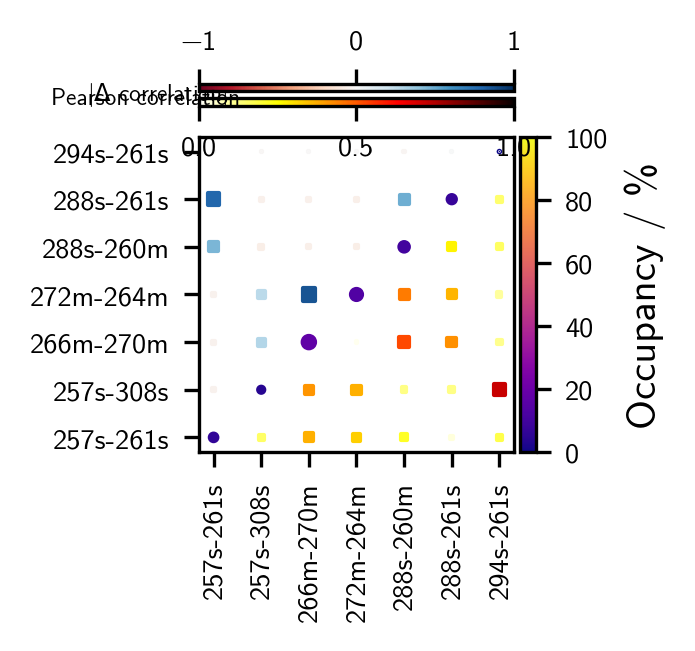

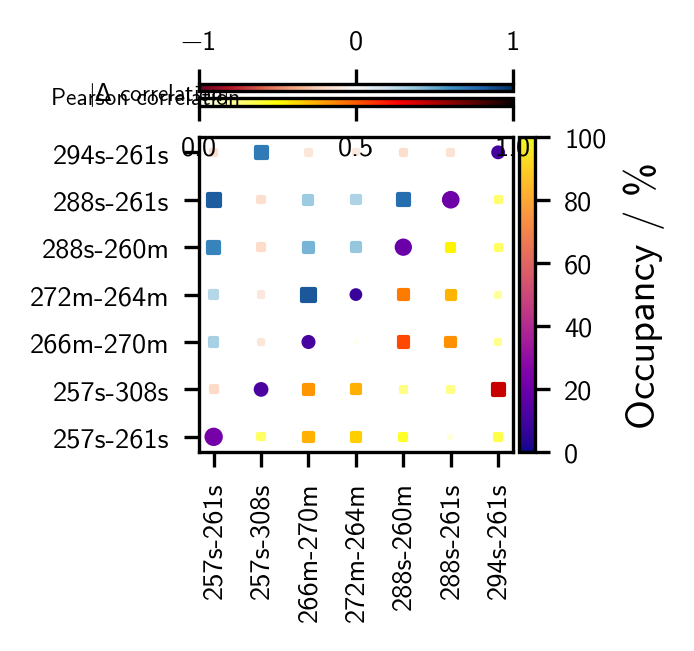

In [161]:
xticklabelsize = copy.copy(mpl.rcParams["xtick.labelsize"])
yticklabelsize = copy.copy(mpl.rcParams["ytick.labelsize"])

mpl.rcParams["xtick.labelsize"] = "x-small"
mpl.rcParams["ytick.labelsize"] = "x-small"

cutoff = 0.7
selected_bonds = np.asarray("253m-296m 256s-294m 257s-261s 257s-293m 257s-294s 257s-308s 258m-256m 262m-259m 262m-261s 265s-256m 266m-270m 272m-264m 274s-263s 276m-273m 287m-308s 288s-260m 288s-261s 288s-291s 292m-289m 294m-292m 294m-309m 294s-261s 294s-291m 297s-307s 308m-285s".split())

x_filter1 = np.unique(np.where(abs(C[v1]) > cutoff)[0])
x_filter2 = np.unique(np.where(abs(C[v2]) > cutoff)[0])
x_filter = np.unique(np.concatenate([x_filter1, x_filter2]))

y_filter1 = np.unique(np.where(abs(C[v1]) > cutoff)[1])
y_filter2 = np.unique(np.where(abs(C[v2]) > cutoff)[1])
y_filter = np.unique(np.concatenate([y_filter1, y_filter2]))

R = {}
for k, v in C.items():   
    R[k] = v[x_filter, :]
    R[k] = R[k][:, y_filter]

selected_bonds_i = np.where(np.asarray([x in selected_bonds for x in np.asarray(mingled_bonds_f)[si_name][x_filter]]))[0]

for k, v in R.items():   
    R[k] = v[selected_bonds_i, :]
    R[k] = R[k][:, selected_bonds_i]

RD = R[v1] - R[v2]
tril = np.tril_indices_from(RD)
triu = np.triu_indices_from(RD)

for k, v in R.items():
    fig, ax = plt.subplots(
        figsize=(mpl.rcParams['figure.figsize'][0],
                 mpl.rcParams['figure.figsize'][1],)
        )

    R_ = np.zeros_like(v)
    R_[tril] = abs(RD[tril])
    
    dcs = hmap(
        R_, ax,
        scatter_props={
            "cmap": mpl.cm.hot_r,
            "vmin": 0, "vmax": 1},
            # "edgecolor": "k", "linewidth": 0.5
        size_scale=10,
        xlabels=np.asarray(mingled_bonds_f)[si_name][x_filter][selected_bonds_i],
        ylabels=np.asarray(mingled_bonds_f)[si_name][y_filter][selected_bonds_i],
        )
    ax.set(**{"aspect": "equal"})
    
    R_ = np.zeros_like(v)
    R_[triu] = v[triu]
    
    cs = hmap(
        R_, ax,
        scatter_props={
            "cmap": mpl.cm.RdBu,
            "vmin": -1, "vmax": 1},
            # "edgecolor": "k", "linewidth": 0.5
        size_scale=10,
        xlabels=np.asarray(mingled_bonds_f)[si_name][x_filter][selected_bonds_i],
        ylabels=np.asarray(mingled_bonds_f)[si_name][y_filter][selected_bonds_i],
        )
    ax.set(**{"aspect": "equal"})

    ax_divider = make_axes_locatable(ax)
    os_cax = ax_divider.append_axes("right", size="5%", pad="2%")
    dcs_cax = ax_divider.append_axes("top", size="2.5%", pad="10%")
    cs_cax = ax_divider.append_axes("top", size="2.5%", pad="2%")
    

    d = range(len(np.asarray(mingled_bonds_f)[si_name][x_filter][selected_bonds_i]))
    os = ax.scatter(
        d, d,
        s=mingled_occ_f[k][si_name][x_filter][selected_bonds_i]*50,
        c=mingled_occ_f[k][si_name][x_filter][selected_bonds_i]*100,
        cmap=mpl.cm.plasma,
        vmin=0, vmax=100,
        # edgecolor="k",
        # linewidth=0.5
        )
    
    ob = fig.colorbar(os, cax=os_cax)
    os_cax.set_ylabel("Occupancy / %")

    cb = fig.colorbar(cs, cax=cs_cax, orientation="horizontal")
    cs_cax.set_xlabel("Pearson correlation", x=-0.17, labelpad=-18, fontsize="xx-small")
    
    cs_cax.xaxis.set_ticks_position("top")
    cs_cax.xaxis.set_label_position("top")

    dcb = fig.colorbar(dcs, cax=dcs_cax, orientation="horizontal")
    dcs_cax.set_xlabel(r"|$\Delta$ correlation|", x=-0.13, labelpad=-19, fontsize="xx-small")    
    
    fig.tight_layout(pad=0.1)
    # fig.savefig(f"/home/janjoswig/Documents/Projects/Langerin/Manuscript/I/figures/hb/pearson_correlation_{k[:2]}.png")
    

mpl.rcParams["xtick.labelsize"] = xticklabelsize
mpl.rcParams["ytick.labelsize"] = yticklabelsize

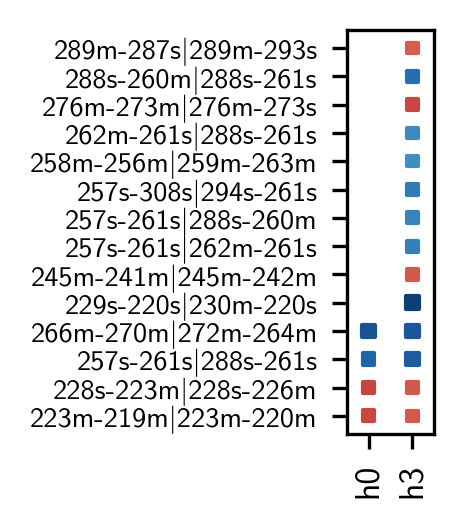

In [221]:
# xticklabelsize = copy.copy(mpl.rcParams["xtick.labelsize"])
yticklabelsize = copy.copy(mpl.rcParams["ytick.labelsize"])

# mpl.rcParams["xtick.labelsize"] = "small"
mpl.rcParams["ytick.labelsize"] = "x-small"

fig, ax = plt.subplots(
    figsize=(mpl.rcParams['figure.figsize'][0]*0.5,
             mpl.rcParams['figure.figsize'][1]*0.85,)
    )

hmap(
    np.array(r), ax,
    scatter_props={"cmap": mpl.cm.RdBu, "vmin": -1, "vmax": 1},
    size_scale=10,
    ylabels=sparse_bonds,
    xlabels=["h0", "h3"]
)

ax.set_xlim(-0.5, 1.5)
# fig.tight_layout(pad=0.1)
fig.subplots_adjust(left=0.8, right=0.98, bottom=0.2, top=0.99)
fig.savefig(f"/home/janjoswig/Documents/Projects/Langerin/Manuscript/I/figures/hb/pearson_correlation_sparse.png")

mpl.rcParams["ytick.labelsize"] = yticklabelsize